In [12]:
#reading the ascii file

with open('D:/Thesis/LASD/measurements/zsysdf.ascii', 'r') as file:
    content = file.readline()
    print(content)

galaxy	Dec	Dx_max	Dx_max_16percentile	Dx_max_50percentile	Dx_max_84percentile	Dx_mean	Dx_mean_16percentile	Dx_mean_50percentile	Dx_mean_84percentile	EW	EW_16percentile	EW_50percentile	EW_84percentile	FWHM_max	FWHM_max_16percentile	FWHM_max_50percentile	FWHM_max_84percentile	FWHM_neg	FWHM_neg_16percentile	FWHM_neg_50percentile	FWHM_neg_84percentile	FWHM_pos	FWHM_pos_16percentile	FWHM_pos_50percentile	FWHM_pos_84percentile	F_cont	F_cont_16percentile	F_cont_50percentile	F_cont_84percentile	F_lc	F_lc_16percentile	F_lc_50percentile	F_lc_84percentile	F_max	F_max_16percentile	F_max_50percentile	F_max_84percentile	F_neg_max	F_neg_max_16percentile	F_neg_max_50percentile	F_neg_max_84percentile	F_pos_max	F_pos_max_16percentile	F_pos_max_50percentile	F_pos_max_84percentile	F_valley	F_valley_16percentile	F_valley_50percentile	F_valley_84percentile	L_neg	L_neg_16percentile	L_neg_50percentile	L_neg_84percentile	L_pos	L_pos_16percentile	L_pos_50percentile	L_pos_84percentile	L_tot	L_tot_16percentile	L_

In [53]:
import matplotlib.pyplot as plt
import numpy as np

#extracting data
with open('D:/Thesis/LASD/measurements/zsysdf.ascii', 'r') as file:
    header = file.readline().strip().split()

    L_pos = []
    L_tot = []
    EW = []
    L_neg = []
    x_pos_max = []
    x_pos_mean = []
    x_neg_max = []
    x_neg_mean = []
    
    for line in file:
        values = line.strip().split()

        try:
           L_pos.append(float(values[header.index('L_pos')]))
           L_tot.append(float(values[header.index('L_tot')]))
           L_neg.append(float(values[header.index('L_neg')]))
           EW.append(float(values[header.index('EW')]))
           x_pos_max.append(float(values[header.index('x_pos_max')]))# Peak position determined by maximum luminosity density on red side
           x_pos_mean.append(float(values[header.index('x_pos_mean')]))
           x_neg_max.append(float(values[header.index('x_neg_max')]))
           x_neg_mean.append(float(values[header.index('x_neg_mean')]))
        except ValueError:
            continue

#making numpy arrays
L_pos = np.array(L_pos)
L_neg = np.array(L_neg)
L_tot = np.array(L_tot)
EW = np.array(EW)
x_pos_max = np.array(x_pos_max)



<class 'list'>


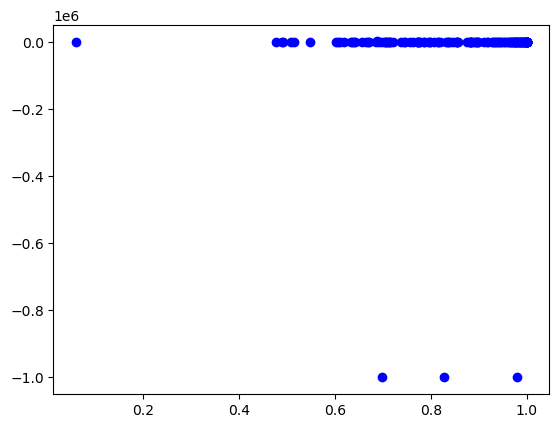

In [59]:

L_pos_L_tot = [l_pos / l_tot for l_pos, l_tot in zip(L_pos, L_tot)]
plt.scatter(L_pos_L_tot, EW, label='L_pos/L_tot vs EW', color='blue')



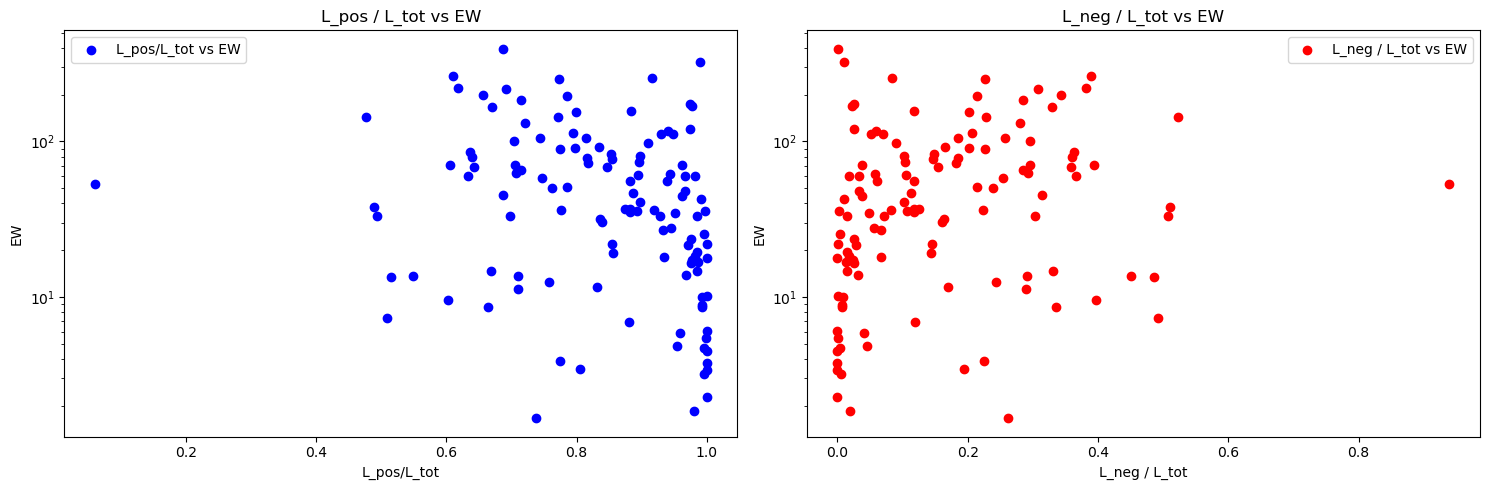

In [58]:
#plotting asymmetry and EW
asymmetry1 = L_pos/L_tot
asymmetry2 = L_neg/L_tot

# L_pos / L_tot vs EW
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].scatter(asymmetry1, EW, color = 'blue', label = 'L_pos/L_tot vs EW')
axs[0].set_yscale('log')
axs[0].set_xlabel('L_pos/L_tot')
axs[0].set_ylabel('EW')
axs[0].set_title('L_pos / L_tot vs EW')
axs[0].legend()

#  L_neg / L_tot vs EW
axs[1].scatter(asymmetry2, EW, color='red', label='L_neg / L_tot vs EW')
axs[1].set_yscale('log')
axs[1].set_xlabel('L_neg / L_tot')
axs[1].set_ylabel('EW')
axs[1].set_title('L_neg / L_tot vs EW')
axs[1].legend()


# Adjust layout and show the plots
plt.tight_layout()
plt.show()

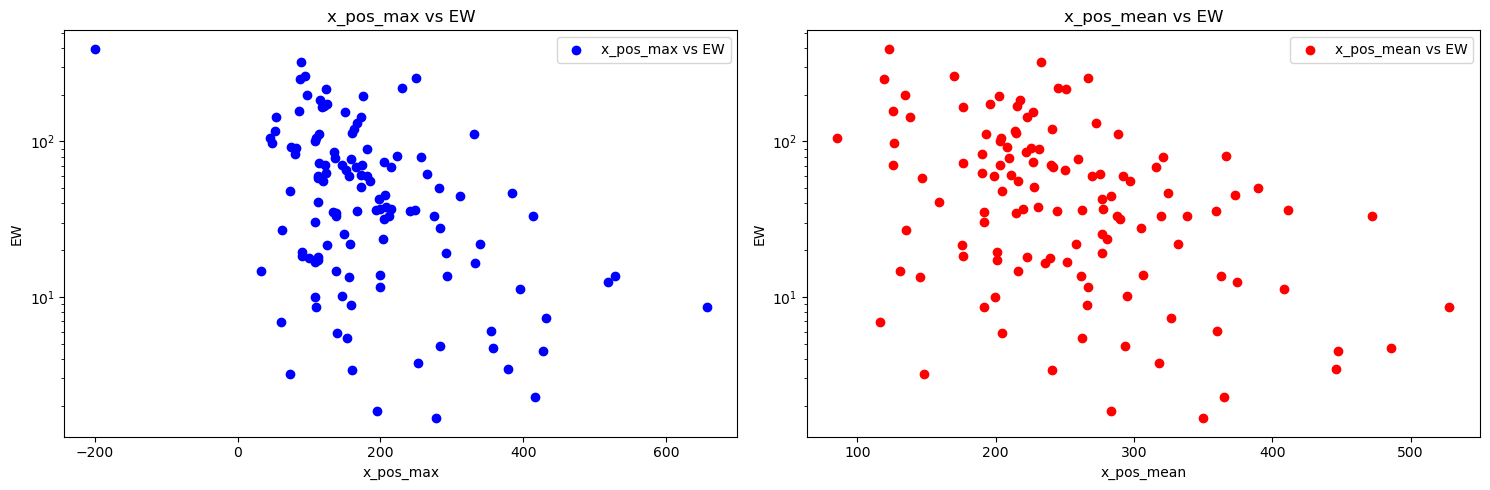

In [61]:
#plotting peak positions(red side) and EW

fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].scatter(x_pos_max, EW, color = 'blue', label = 'x_pos_max vs EW')
axs[0].set_yscale('log')
axs[0].set_xlabel('x_pos_max')
axs[0].set_ylabel('EW')
axs[0].set_title('x_pos_max vs EW')
axs[0].legend()

#  L_neg / L_tot vs EW
axs[1].scatter(x_pos_mean, EW, color='red', label='x_pos_mean vs EW')
axs[1].set_yscale('log')
axs[1].set_xlabel('x_pos_mean')
axs[1].set_ylabel('EW')
axs[1].set_title('x_pos_mean vs EW')
axs[1].legend()


# Adjust layout and show the plots
plt.tight_layout()
plt.show()

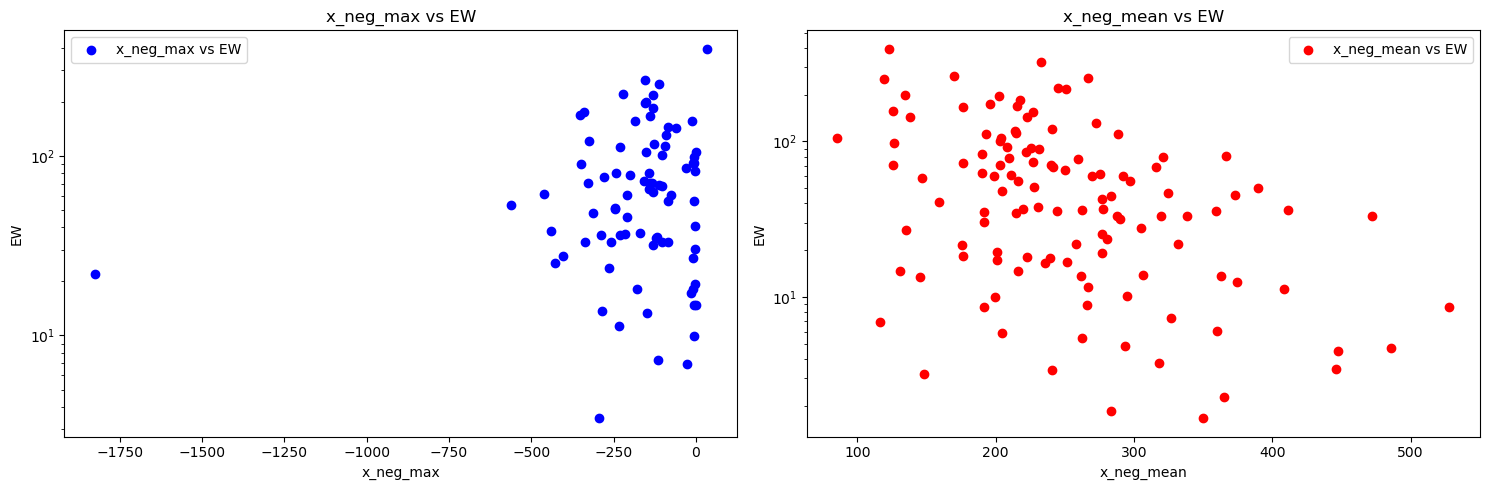

In [62]:
#plotting peak positions(blue side) and EW

fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].scatter(x_neg_max, EW, color = 'blue', label = 'x_neg_max vs EW')
axs[0].set_yscale('log')
axs[0].set_xlabel('x_neg_max')
axs[0].set_ylabel('EW')
axs[0].set_title('x_neg_max vs EW')
axs[0].legend()

#  L_neg / L_tot vs EW
axs[1].scatter(x_pos_mean, EW, color='red', label='x_neg_mean vs EW')
axs[1].set_yscale('log')
axs[1].set_xlabel('x_neg_mean')
axs[1].set_ylabel('EW')
axs[1].set_title('x_neg_mean vs EW')
axs[1].legend()


# Adjust layout and show the plots
plt.tight_layout()
plt.show()